In [13]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()

# データ読み込みに利用
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# sktime：グラフ描画
from sktime.utils.plotting import plot_series

# sktime：予測
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

# sktime：予測の評価指標
from sktime.performance_metrics.forecasting import (
    mean_absolute_scaled_error, MeanAbsoluteError,
    mean_absolute_percentage_error, mean_absolute_error
)

# sktime：予測の評価
from sktime.forecasting.model_selection import (
    temporal_train_test_split, ExpandingWindowSplitter, ForecastingGridSearchCV
)
from sktime.forecasting.model_evaluation import evaluate

# sktime：データの変換
from sktime.transformations.series.detrend import (
    Deseasonalizer, Detrender
)
from sktime.transformations.series.difference import Differencer
from sktime.transformations.series.boxcox import LogTransformer

# sktime：パイプライン
from sktime.forecasting.compose import (
    TransformedTargetForecaster, MultiplexForecaster
)
from sktime.transformations.compose import OptionalPassthrough

# グラフの日本語表記
from matplotlib import rcParams

In [3]:
#データセットの準備
air_passengers = sm.datasets.get_rdataset('AirPassengers').data

air_passengers.index = pd.period_range(
    start='1949-01', periods=len(air_passengers), freq='M')
air_passengers = air_passengers.drop(air_passengers.columns[0], axis=1)

In [6]:
train, test = temporal_train_test_split(air_passengers, test_size=36)

fh = np.arange(1, len(test) + 1)

In [9]:
#Holt-Winster法のstatsmodelでの実装
hw_air = tsa.ExponentialSmoothing(
    train, trend='add', seasonal='add', seasonal_periods=12).fit()

pred = hw_air.forecast(len(test))

mean_absolute_error(test, pred)

21.544775457219366

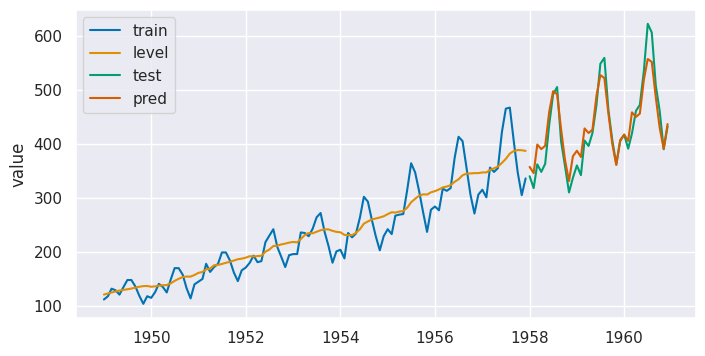

In [11]:
fig, ax = plot_series(train, hw_air.level, test, pred,
                      labels=['train', 'level', 'test', 'pred'],
                      markers=np.tile('', 4))

fig.set_size_inches(8, 4)

In [14]:
#Holt-Winster法のsktimeでの実装
hw_forecaster = ExponentialSmoothing(trend='add', seasonal='add')

hw_forecaster.fit(train)

hw_fore_sk = hw_forecaster.predict(fh)

TypeError: float() argument must be a string or a real number, not 'Period'

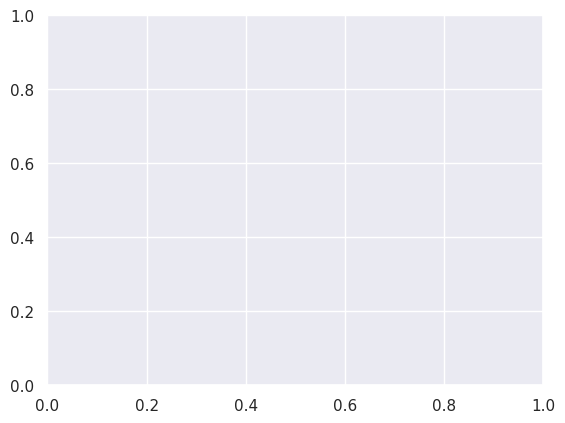